# **Statistical Test**

In [1]:
#Import the stats module from scipy, pandas, matplotlib, numpy and seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [9]:
%config InlineBackend.figure_format = 'retina'

# **Import Data**

In [3]:
# Import the dataset ICU_Mortality.csv
df = pd.read_csv('ICU_Mortality.csv')

In [4]:
#Show info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Mortality  311 non-null    object 
 1   Age        311 non-null    int64  
 2   WCC        311 non-null    float64
 3   HB         311 non-null    float64
 4   Diabetes   213 non-null    object 
 5   Class      311 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 14.7+ KB


In [5]:
# Show the first 5 rows of the dataset
df.head()

,Mortality,Age,WCC,HB,Diabetes,Class
0,Died,69,12.0,11.7,NaN,Non-infectious
1,Died,73,9.0,13.2,NaN,Non-infectious
2,Died,53,16.4,11.1,NaN,Non-infectious
3,Died,74,10.1,11.2,Type II,Infectious
4,Died,69,10.2,15.0,Type I,Infectious


# **EDA**

## Mortality

In [6]:
#Calculate the frequency of the categories in the "Mortality" column
df['Mortality'].value_counts()

Mortality
Survived    207
Died        104
Name: count, dtype: int64

In [7]:
#Calculate the relative frequency of the categories in the "Mortality" column
df['Mortality'].value_counts(normalize=True)

Mortality
Survived    0.665595
Died        0.334405
Name: proportion, dtype: float64

<Axes: title={'center': 'Mortality'}, xlabel='Mortality', ylabel='Frequency'>

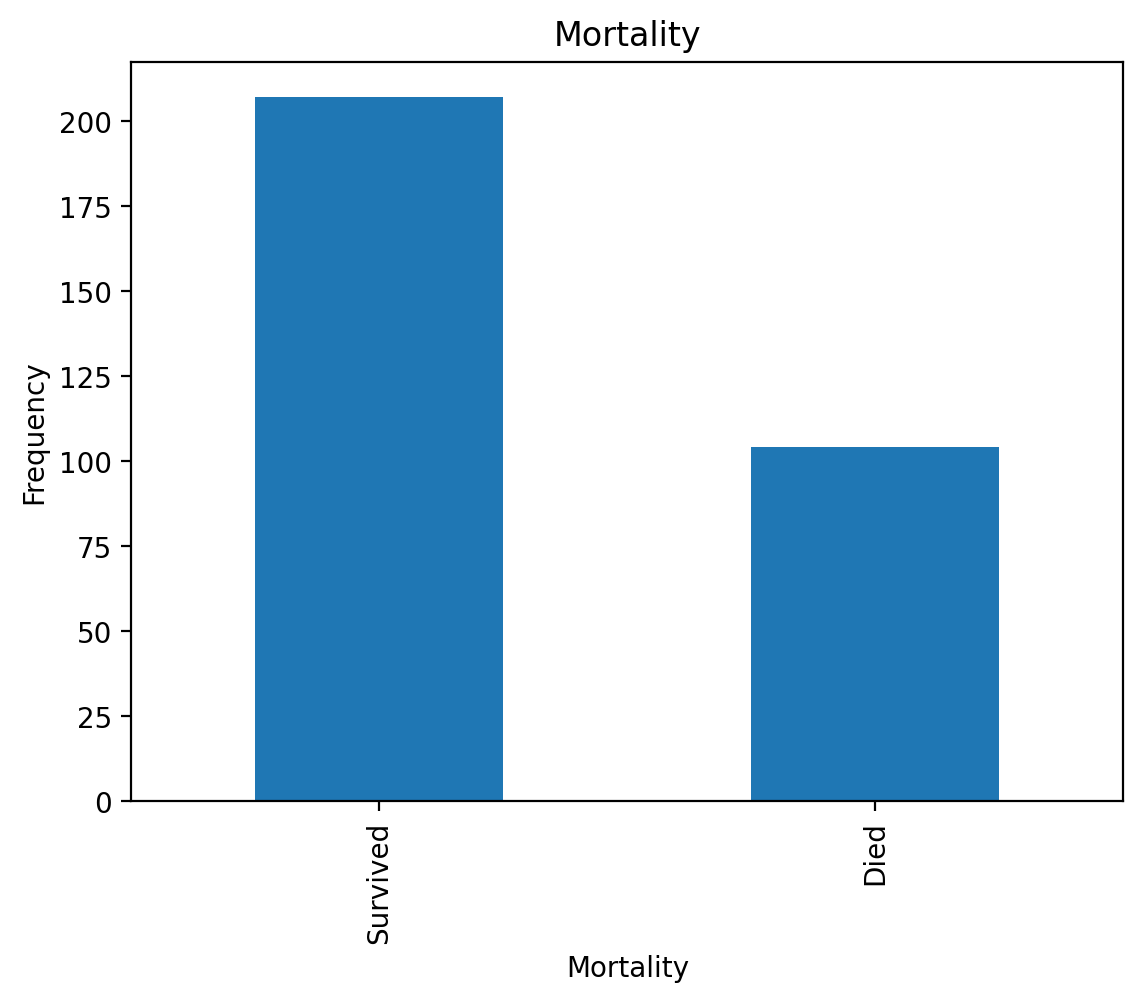

In [11]:
# Create a bar chart of the frequncy of the categories in the "Mortality" column
#Add the title "Mortality"
# Add the horizontal axis label "Mortality"
# Add the vertical axis label "Frequency"
df['Mortality'].value_counts().plot(kind='bar', title='Mortality', xlabel='Mortality', ylabel='Frequency')


# Age

In [12]:
# Calculate summarry statistics for the "Age" column for each category in the "Mortality" column
df.groupby('Mortality')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Mortality,,,,,,,,
Died,104.0,61.125000,9.738012,45.0,52.75,61.0,69.0,77.0
Survived,207.0,54.111111,10.830209,23.0,47.00,53.0,60.0,85.0


[Text(0.5, 1.0, 'Age by Mortality'),
 Text(0.5, 0, 'Mortality'),
 Text(0, 0.5, 'Age')]

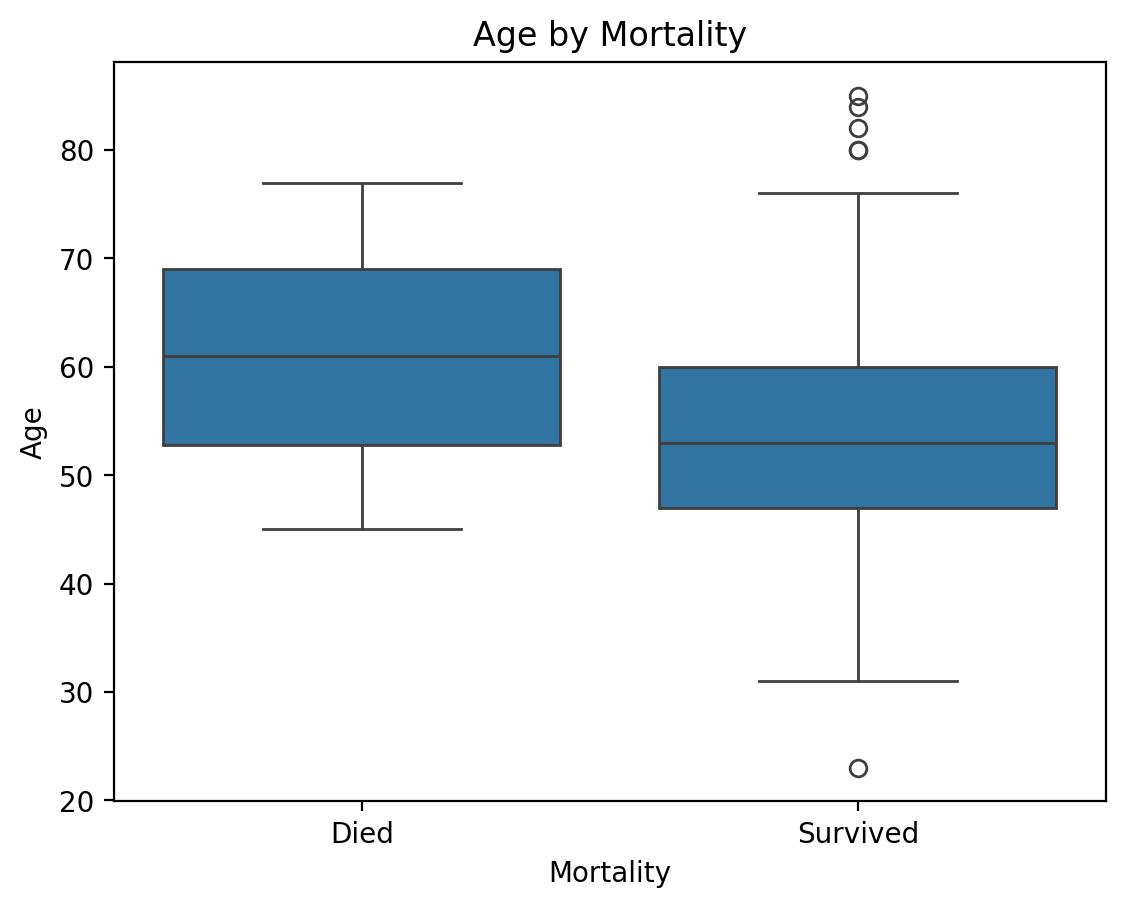

In [13]:
#Create a box and whisker plot of the "Age" column for each category in the "Mortality" column
#Add the title "Age by Mortality"
# Add the horizontal axis label "Mortality"
# Add the vertical axis label "Age"
sns.boxplot(x='Mortality', y='Age', data=df).set(title='Age by Mortality', xlabel='Mortality', ylabel='Age')


# **Statistical Tests**

#### Age Comparison between survivors and non-survivors

In [15]:
# Create a numpy array of the 'Age' column only for the 'Mortalirty' category 'Died'
#Assign the array to the variable 'age_died'
age_died = df[df['Mortality'] == 'Died']['Age'].to_numpy()

# Create a numpy array of the 'Age' column only for the 'Mortalirty' category 'Survived'
#Assign the array to the variable 'age_survived'
age_survived = df[df['Mortality'] == 'Survived']['Age'].to_numpy()

In [16]:
#Calculate the ratio of variances between 'age_died' and 'age_survived'
age_died.var() / age_survived.var()

np.float64(0.8045888311255794)

In [17]:
#Conduct Levene's test for equal variances
stats.levene(age_died, age_survived)

LeveneResult(statistic=np.float64(7.0145796435275225e-06), pvalue=np.float64(0.9978885101059543))

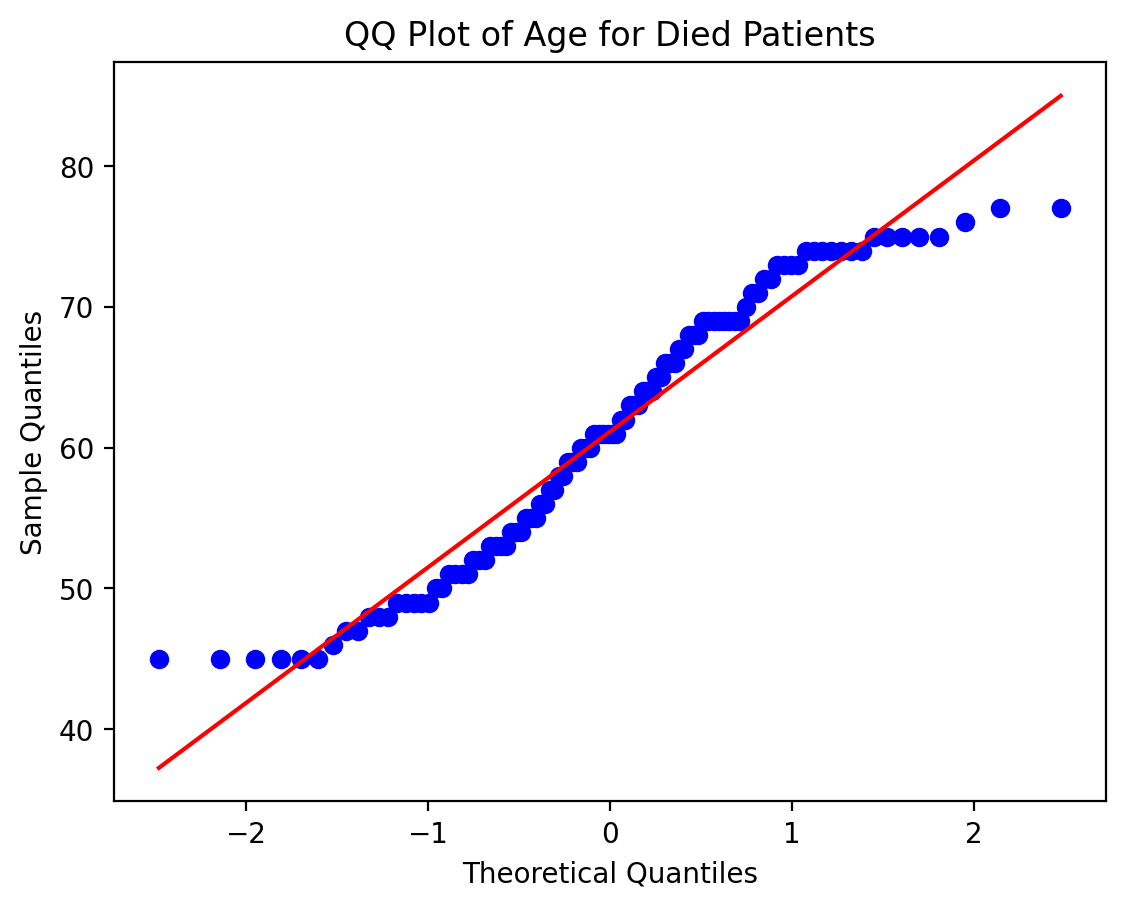

In [20]:
# Create a QQ plot of the "age_died" data
#Add the title "QQ Plot of Age for Died Patients"
# Add the horizontal axis label "Theoretical Quantiles"
# Add the vertical axis label "Sample Quantiles"
stats.probplot(age_died, dist="norm", plot=plt)
plt.title('QQ Plot of Age for Died Patients')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

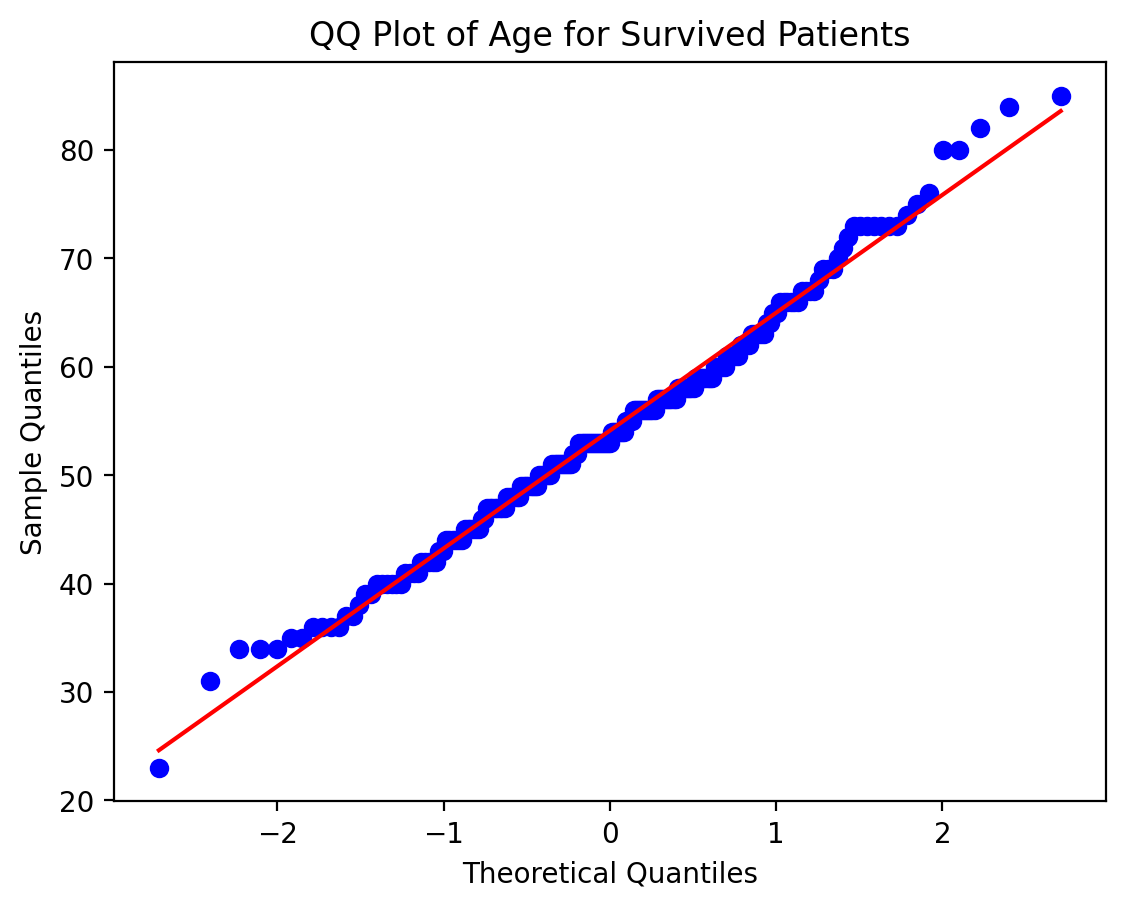

In [21]:
#Create a similar QQ plot for the "age_survived" data
stats.probplot(age_survived, dist="norm", plot=plt)
plt.title('QQ Plot of Age for Survived Patients')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [22]:
# Conduct a Shapiro-Wilk test for normality on the "age_died" data
stats.shapiro(age_died)

ShapiroResult(statistic=np.float64(0.9420111357919865), pvalue=np.float64(0.00018938181206075793))

In [23]:
#Create a shapiro-wilk test for normality on the "age_survived" data
stats.shapiro(age_survived)

ShapiroResult(statistic=np.float64(0.9910479904980413), pvalue=np.float64(0.2308916592704981))

In [24]:
#Conduct a t-test for equal means between the "age_died" and "age_survived" data
# Set the significance level to 0.05
alpha = 0.05
t_stat, p_value = stats.ttest_ind(age_died, age_survived, equal_var=False)
t_stat, p_value
#Print the t-statistic and p-value
print(f'T-statistic: {t_stat}, P-value: {p_value}')
#Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in means.")

T-statistic: 5.768400482066551, P-value: 2.6033604103625934e-08
Reject the null hypothesis: There is a significant difference in means.


In [25]:
#Conduct a Mann-Whitney U test for equal medians between the "age_died" and "age_survived" data
# Set the significance level to 0.05
alpha = 0.05
u_stat, p_value = stats.mannwhitneyu(age_died, age_survived)
#Print the U-statistic and p-value
print(f'U-statistic: {u_stat}, P-value: {p_value}')
#Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in medians.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in medians.")

U-statistic: 14709.5, P-value: 1.3213922162691065e-07
Reject the null hypothesis: There is a significant difference in medians.


The mean age of the survivors is 54 years (SD), while the mean age of the non-survivors is 61 years (). There is enough evidence in the data at the 5% level of significance to conclude that the mean age of the survivors is different from the mean-age of non-survivors. Due to the violation of normality, the Mann-Whitney U test was used to compare the two groups. The p-value is less than 0.05, indicating a significant difference in age between the two groups. 

### ***Mortality vs Class***

In [35]:
# Create a contigency table of the 'Class' and 'Mortality' columns
pd.crosstab(df['Class'], df['Mortality'])

Mortality,Died,Survived
Class,,
Infectious,49,101
Non-infectious,55,106


In [36]:
#Use the contingency table to calculate the expected frequencies
contingency_table = pd.crosstab(df['Class'], df['Mortality'])
expected_frequencies = stats.contingency.expected_freq(contingency_table)
expected_frequencies

array([[ 50.1607717,  99.8392283],
       [ 53.8392283, 107.1607717]])

In [37]:
#B Conduct a Chi-squared test for independence between the 'Class' and 'Mortality' columns
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f'Chi-squared statistic: {chi2_stat}, P-value: {p_value}, Degrees of freedom: {dof}')
#Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between Class and Mortality.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Class and Mortality.")

Chi-squared statistic: 0.025261737710934283, P-value: 0.8737166065287936, Degrees of freedom: 1
Fail to reject the null hypothesis: There is no significant association between Class and Mortality.


### WCC vs HB

In [38]:
# Summary Statistics of 'WCC' column
df['WCC'].describe()

count    311.000000
mean      10.286817
std        4.023486
min       -0.800000
25%        7.600000
50%       10.000000
75%       12.650000
max       30.800000
Name: WCC, dtype: float64

In [39]:
#Summary statistics of 'HB' column
df['HB'].describe()

count    311.000000
mean      13.529260
std        2.459835
min        4.900000
25%       11.950000
50%       13.600000
75%       15.150000
max       20.200000
Name: HB, dtype: float64

[Text(0.5, 1.0, 'WCC vs HB'), Text(0.5, 0, 'WCC'), Text(0, 0.5, 'HB')]

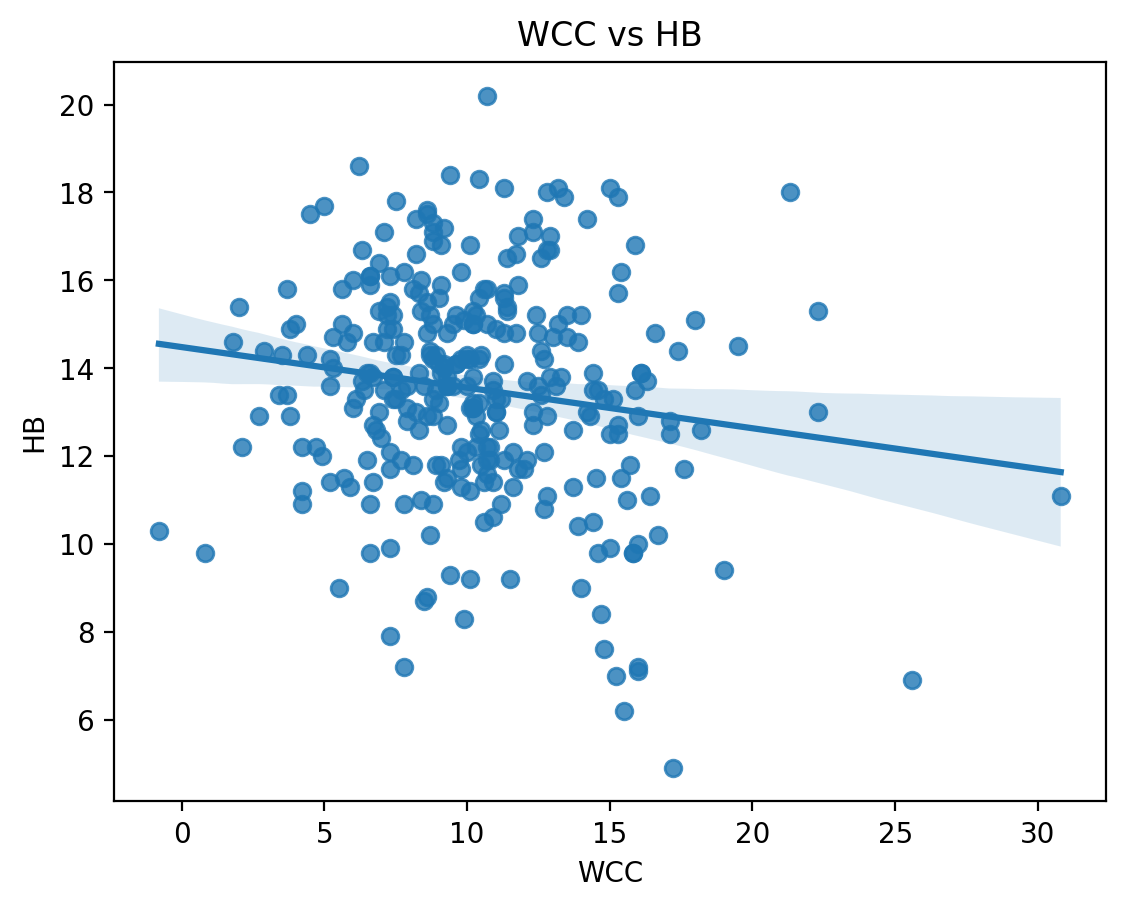

In [46]:
#Create a scatter plot of 'WCC' vs 'HB' with a regression line
#Add the title "WCC vs HB"
# Add the horizontal axis label "WCC"
# Add the vertical axis label "HB"
sns.regplot(x='WCC', y='HB', data=df).set(title='WCC vs HB', xlabel='WCC', ylabel='HB')


##### The light blue is the 95% confidence interval. The line can tilt a little bit within the light blue range

In [43]:
#Calculate the correlation coefficient between 'WCC' and 'HB'
correlation_coefficient = df['WCC'].corr(df['HB'])
print(f'Correlation coefficient between WCC and HB: {correlation_coefficient}')

Correlation coefficient between WCC and HB: -0.15112591679462964


In [44]:
#COnduct a Pearson correlation test between 'WCC' and 'HB'
pearson_stat, p_value = stats.pearsonr(df['WCC'], df['HB'])
print(f'Pearson correlation statistic: {pearson_stat}, P-value: {p_value}')
#Check if the null hypothesis can be rejected
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant correlation between WCC and HB.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between WCC and HB.")

Pearson correlation statistic: -0.1511259167946297, P-value: 0.007590698508170839
Reject the null hypothesis: There is a significant correlation between WCC and HB.
